# Leaning outcomes
- IMage histogram
-HIstogram euqalization / CLAHE:
    * purpose: contrast enhancement (same effect as simple scalar multlipication)
- Theresholding (end results, binary mask with 255 as fore ground)
- Morphological operations (manipulate the mask)
    - Erosion
    - DIlation
    - Opening
    - Closing
- COlor sPACES; rgb, hsv and L\*a\*b
- COlor based segmentation (HSV). HUe represents color, one channel encode color information

## Setup

In [63]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from util_func import show_img
from util_func import plt_img
from matplotlib import pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## IMage histogram

In [2]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# 2 ways to compote histogram
%timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])
%timeit hist, _= np.histogram(gray.flatten(), 256)

21.7 µs ± 357 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
746 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


20.7 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


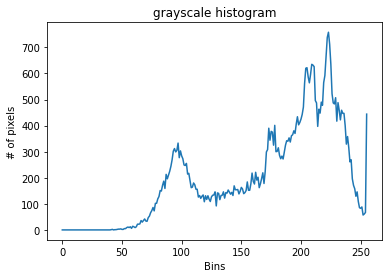

In [8]:

%timeit hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(hist)
plt.show()

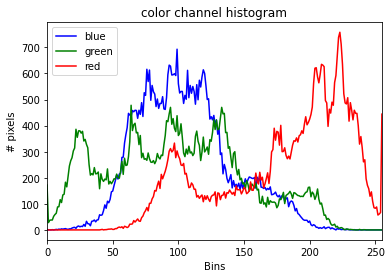

In [7]:
# compute histogram for all channel
channels = cv.split(img)
color = ("blue", "green", "red")

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for ch, color in zip(channels, color):
    hist = cv.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color=color, label = color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

## Histogram equalization

In [3]:
img = cv.imread("images/low_contrast_img.jfif")
show_img("low_contrast", img)

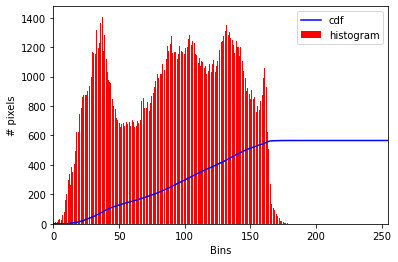

In [15]:
# histogram
hist = cv.calcHist([img], [0], None, [256], [0, 256])

# compute cdf
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, color='r')
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'), loc='best')
plt.show()

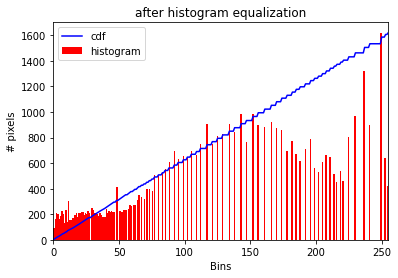

In [12]:
# histogram equalization

eq = cv.equalizeHist(img)

hist = cv.calcHist([eq], [0], None, [256], [0, 256])

# compute cdf
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(eq.flatten(), 256, color='r')
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.xlim([0, 255])
plt.legend(('cdf', 'histogram'), loc='best')
plt.title("after histogram equalization")
plt.show()

In [14]:
cv.imshow("original", img)
show_img("equalization", eq)

In [9]:
#
img = cv.imread("images/dog1.jfif", 0)

#equalization

eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize=(8,8))
dst = clahe.apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("clash", dst)

In [11]:
#
img = cv.imread("images/winter_low_contrast.jfif", 0)

#equalization

eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit = 4, tileGridSize=(9, 9))
dst = clahe.apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("clash", dst)

# Exercise 1
1. Try histogram equalization and CLAHE on 'winter.jfif' and display the results together with the original grayscale image. Comment on the results obtained.

In [19]:
#
img = cv.imread("images/winter.jfif", 0)

#equalization

eq = cv.equalizeHist(img)
#CLAHE
clahe = cv.createCLAHE(clipLimit = 10, tileGridSize=(5, 5))
dst = clahe.apply(img)

cv.imshow("original", img)
cv.imshow("equalization", eq)
show_img("clash", dst)

In [21]:
[i for i in dir(cv) if i.startswith("THRESH")]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [3]:
img = np.fromfunction(lambda i, j:j, (50, 256), dtype=np.uint8)

def trackbar(x):
    _, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY)
    _, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV)
    _, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC)
    _, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    _, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    cv.imshow("window", np.vstack((img1, img2, img3, img4, img5)))
    
cv.namedWindow("window")
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Comparison on the thresholding methods 

In [4]:
img = cv.imread("images/noisy.jfif", 0)
show_img("noisy image", img)

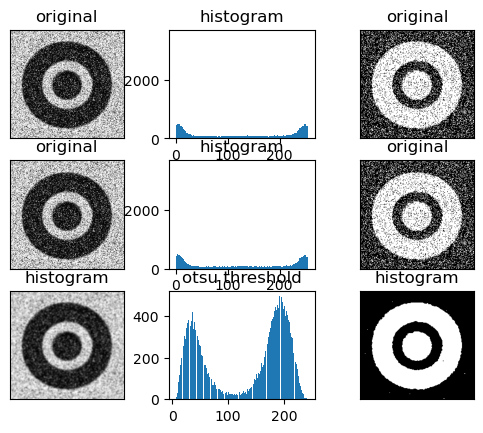

In [8]:
# apply 3 methods
#1: global threshold
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

#2: OTSU threshold
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3: Gaussian blur + otsu threshold
blur = cv.GaussianBlur(img, (5, 5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img, 0, th1,
       img, 0, th2,
       blur, 0, th3]

titles = ("original", "histogram", "global threshold",
         "original", "histogram", "otsu threshold"
         "blur", "histogram", "otsu threshold")

for i in range(3):
    plt.subplot(3, 3, 3*i+1), plt_img(imgs[3*i], title=titles[3*i])
    plt.subplot(3, 3, 3*i+2), plt.hist(imgs[3*i].flatten(), 256)
    plt.title(titles[3*i+1])
    plt.subplot(3, 3, 3*i+3), plt_img(imgs[3*i+2], title=titles[3*i])

## MOrphological operations
- erosion
- dilation
- opening (erotion + dilation)
- closing (dilation + erosion)


In [20]:
# define structuing elemt
kernel = np.ones((3, 3), dtype=np.uint8)

#erosion
dst = cv.erode(th3, kernel, iterations=1)

#show
img_combined = np.hstack((th3, dst))

show_img("erosion", img_combined)

In [105]:
# trackbar
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)
cv.createTrackbar("iter", wn, 3, 10, nothing)

while(1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
        
    iteration = cv.getTrackbarPos("iter", wn)
    if iteration < 1:
        iteration = 1
        
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    #erosion
    erosion = cv.erode(th3, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


In [24]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [25]:
# CLOSING
res = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, iterations=2)

img_combined = np.hstack((th3, res))

show_img("closing", img_combined)

## Color spaces
- RGB(the most prevalent color space. Any picture is stored under this format, but the downside of this color space is that there is no clear way to seperate chroma(color and its saturation)). Not suitable for color based segmenatition
- HSV (Hue, Saturation, value)
    - Hue -> color
    - saturation -> purify of color
    - value -> brightness / luminance
- LAB
    - preceptual uniformity ( the Euclidean in the color space corresponds to perceptual uniformity)
    

In [ ]:
# Image shaperning with LAB
#1: split image into l, a, b
#2: sharpen the l channe;
#3: merge color channels
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
l, a, b = cv.split(img_lab)

#define shapening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
l_shaperned = cv.filter2D(1, )

## demo on color based segmentation

In [128]:
img = cv.imread("images/color_space/pant.jfif")
img = cv. cvtColor(img, cv.COLOR_BGR2RGB)

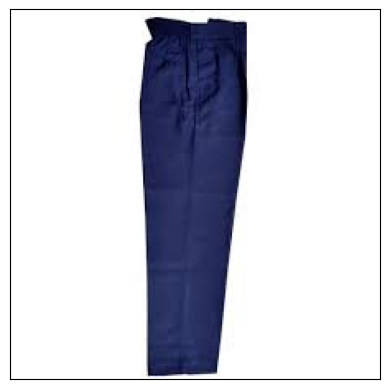

In [121]:
plt_img(img)
plt.show()

### Show the pixels in rgb color space

In [149]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

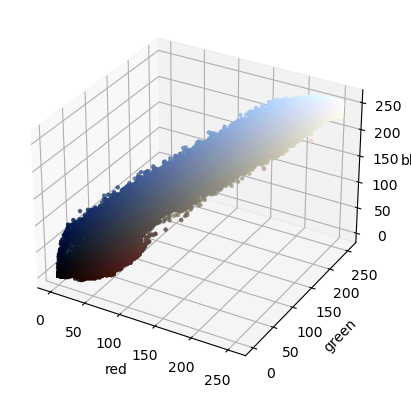

In [136]:
# split the color channels
r, g, b = cv.split(img)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection="3d")

#encode the colour information
pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axes.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors=pixel_colors, marker=".")
axes.view_init(elev=30, azim=300)
axes.set_xlabel("red")
axes.set_ylabel("green")
axes.set_zlabel("blue")
plt.show()

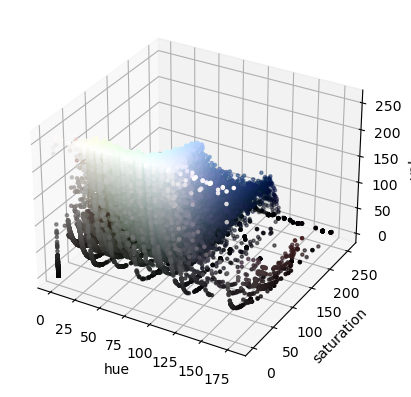

In [137]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

r, g, b = cv.split(img_hsv)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection="3d")

axes.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors=pixel_colors, marker=".")
axes.view_init(elev=30, azim=300)
axes.set_xlabel("hue")
axes.set_ylabel("saturation")
axes.set_zlabel("value")
plt.show()

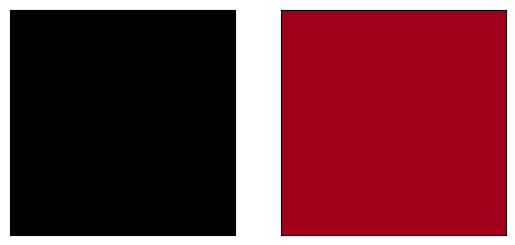

In [191]:
blue_low = (85, 50, 0)
blue_high = (125, 255, 160)

from matplotlib.colors import hsv_to_rgb

square1 = np.full((10, 10, 3), blue_low, dtype= np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype= np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2BGR))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2BGR))
plt.show()

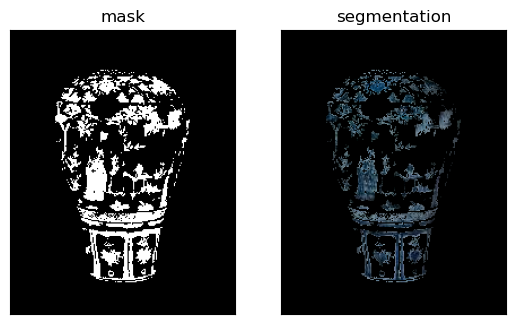

In [42]:
# color based segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt_img(mask, title="mask")
plt.subplot(122), plt_img(res, title="segmentation")
plt.show()

- Does the segmentation generalize to other blue pant images?
- Import all blue pant images ("pant1.jfif" - "pant5.jfif")
- Perform color segmentation
- Display the results

In [48]:
imgs = []

for i in range(1, 6):
    img = f"images/color_space/pant{i}.jfif"
    cv.imread(img)
    

def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image(RGB)
    low_color: hsv low
    high_color: hsv high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_HSV2BGR)
    mask = cv.inRange(img_hsv, color_low, color_high)
    #morphological operation
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img_ori, img_ori, mask=mask)
    
imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high) for img in imgs]

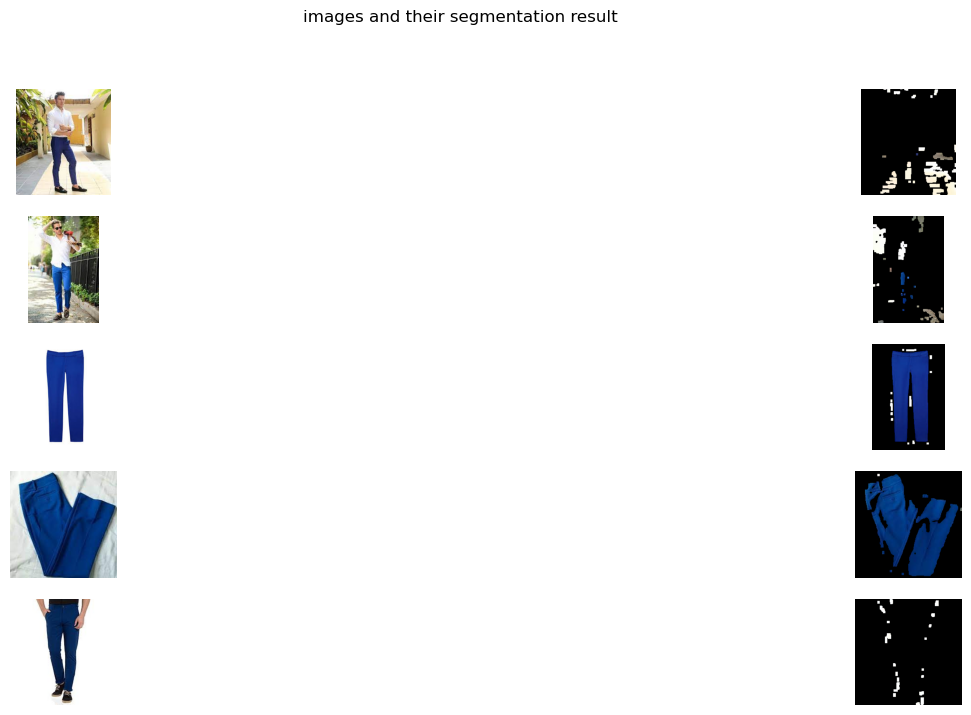

In [49]:
fig, ax = plt.subplots(5, 2, figsize=(20, 8))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and their segmentation result")
plt.show()

# Weekly Activity

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [104]:
# Load the image
image_path = 'images/boat.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw bounding boxes
bounding_boxes_image = image.copy()


# Filter and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
#Filter based on the size of the bounding box
    if w > 50 and h > 50:  # Adjust the values as needed
        cv2.rectangle(bounding_boxes_image, (x,y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow('Result', bounding_boxes_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Write a program to visualize the effect of size of structuring element on the morphological transformation
(e.g. erosion, dilation, opening, and closing).
- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.


In [116]:
#3: Gaussian blur + otsu threshold
blur = cv.GaussianBlur(img, (5, 5), 0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# define structuing elemt
kernel = np.ones((3, 3), dtype=np.uint8)

#erosion
dst = cv.erode(th3, kernel, iterations=1)

#show
img_combined = np.hstack((th3, dst))

# trackbar
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10, nothing)

while(1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size = 3
        
        
    # define the kernel
    kernel = np.ones((size, size), dtype=np.uint8)
    #erosion
    erosion = cv.erode(th3, kernel, iterations=iteration)
    
    cv.imshow(wn, erosion)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'window' in function 'cvGetTrackbarPos'


 3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [182]:
img = cv.imread("images/color_space/porcelain1.jfif")
img = cv. cvtColor(img, cv.COLOR_BGR2RGB)

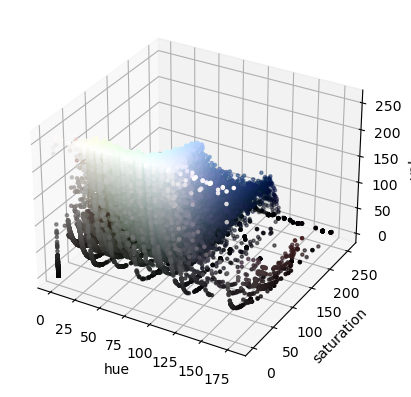

In [183]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

r, g, b = cv.split(img_hsv)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1, projection="3d")

axes.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors=pixel_colors, marker=".")
axes.view_init(elev=30, azim=300)
axes.set_xlabel("hue")
axes.set_ylabel("saturation")
axes.set_zlabel("value")
plt.show()

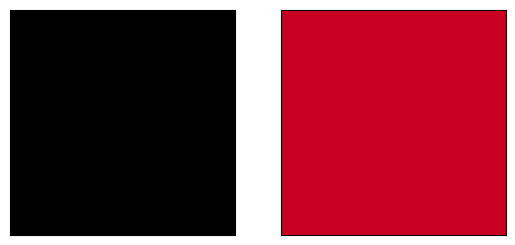

In [187]:
blue_low = (85, 50, 0)
blue_high = (125, 255, 200)
square1 = np.full((10, 10, 3), blue_low, dtype= np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype= np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2BGR))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2BGR))
plt.show()

In [188]:
imgs = []

for i in range(1, 6):
    img = f"images/color_space/porcelain{i}.jfif"
    cv.imread(img)
    

def color_seg(img, color_low, color_high, smooth=True):
    """Arguments
    img: source image(RGB)
    low_color: hsv low
    high_color: hsv high
    smooth: boolean (Gaussian blurring)"""
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_HSV2BGR)
    mask = cv.inRange(img_hsv, color_low, color_high)
    #morphological operation
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    return cv.bitwise_and(img_ori, img_ori, mask=mask)
    
imgs = []
for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
res = [color_seg(img, blue_low, blue_high) for img in imgs]


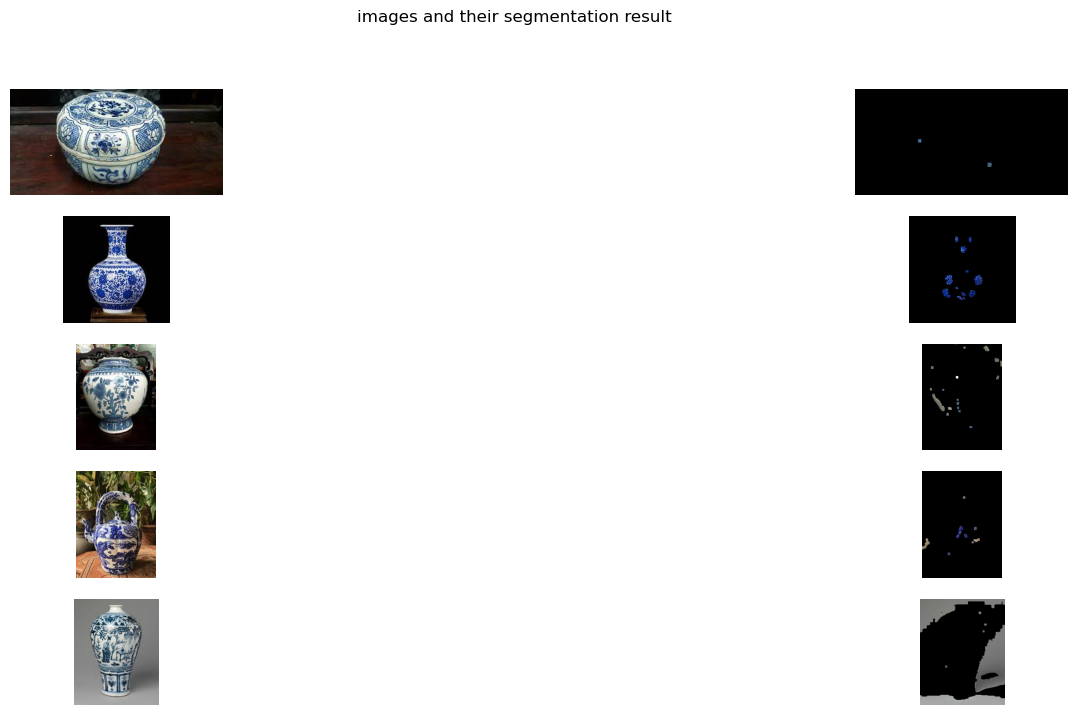

In [189]:
fig, ax = plt.subplots(5, 2, figsize=(20, 8))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("images and their segmentation result")
plt.show()